In [1]:
import requests
import pandas as pd

In [2]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [3]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-09-25 14:23:28.214524')

In [4]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)


In [5]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)


In [6]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-25 15:00:00,18928,18958,18856,18920,19.292630,3.646362e+05
2022-09-25 16:00:00,18914,19009,18914,18999,15.028327,2.852362e+05
2022-09-25 17:00:00,18989,19121,18959,18959,65.627126,1.250276e+06
2022-09-25 18:00:00,18970,19028,18879,19003,26.922897,5.094888e+05
2022-09-25 19:00:00,19002,19014,18872,18940,34.465768,6.524662e+05


<AxesSubplot:xlabel='CloseTime'>

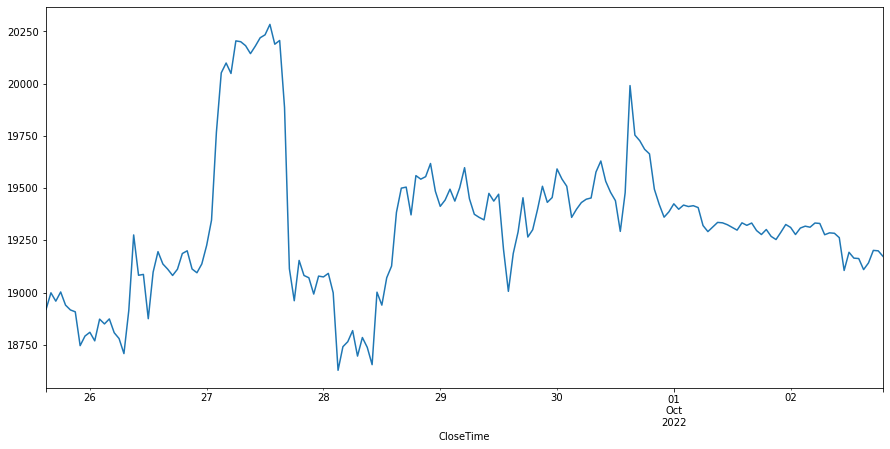

In [7]:
btc['ClosePrice'].plot(figsize=(15, 7))


In [8]:
eth.head()


,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-25 15:00:00,1305.9,1310.0,1299.5,1306.4,666.503298,870225.590761
2022-09-25 16:00:00,1306.3,1313.9,1305.1,1311.2,375.128614,491870.600105
2022-09-25 17:00:00,1311.2,1320.8,1302.6,1302.6,469.631981,615994.114242
2022-09-25 18:00:00,1304.2,1304.2,1282.3,1296.9,577.646884,745459.384623
2022-09-25 19:00:00,1297.1,1300.4,1289.7,1297.2,405.799249,525495.009225


<AxesSubplot:xlabel='CloseTime'>

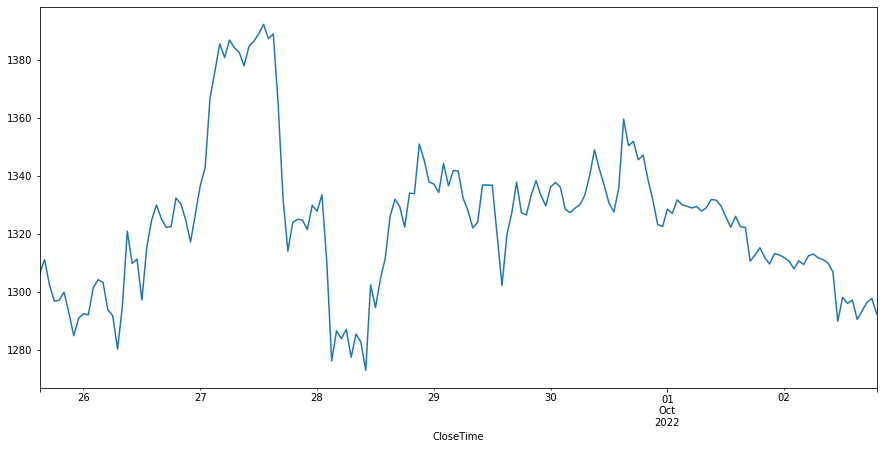

In [9]:
eth['ClosePrice'].plot(figsize=(15, 7))


In [10]:
eth.head()


,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-25 15:00:00,1305.9,1310.0,1299.5,1306.4,666.503298,870225.590761
2022-09-25 16:00:00,1306.3,1313.9,1305.1,1311.2,375.128614,491870.600105
2022-09-25 17:00:00,1311.2,1320.8,1302.6,1302.6,469.631981,615994.114242
2022-09-25 18:00:00,1304.2,1304.2,1282.3,1296.9,577.646884,745459.384623
2022-09-25 19:00:00,1297.1,1300.4,1289.7,1297.2,405.799249,525495.009225


### Bonus: Dynamic plots with Bokeh



In [11]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [12]:
output_notebook()


Loading BokehJS ...

In [13]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)


### Part 4: Exporting to Excel



In [14]:
writer = pd.ExcelWriter('cryptos.xlsx')


In [15]:
btc.to_excel(writer, sheet_name='Bitcoin')


In [16]:
eth.to_excel(writer, sheet_name='Ether')


In [17]:
writer.save()
